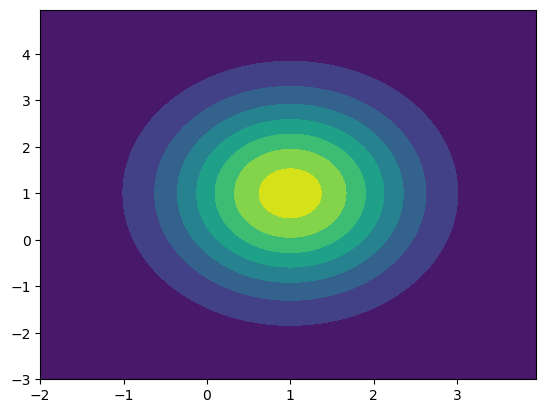

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# 3.1
def plot_normal(mean, cov, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    ax = plt.figure().add_subplot(111)
    ax.contourf(x, y, rv.pdf(pos))

plot_normal([1,1], [[1,0],[0,2]], np.mgrid[-2:4:.05, -3:5:.05])

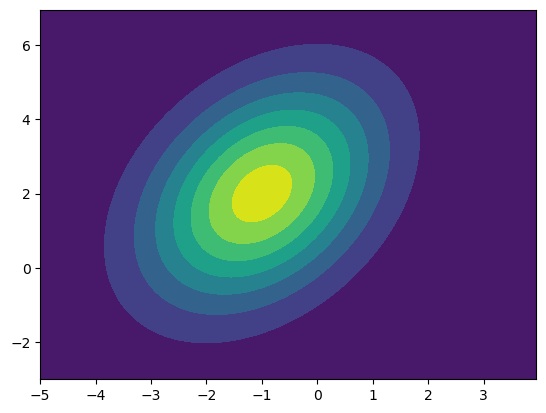

In [5]:
# 3.2

plot_normal([-1,2],[[2,1],[1,4]], np.mgrid[-5:4:.05, -3:7:.05])

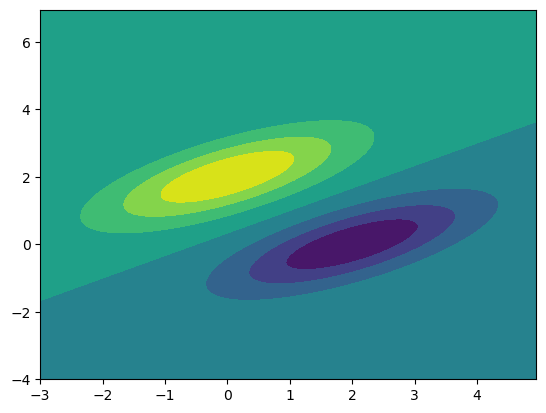

In [6]:
# 3.3
def plot_normal_dif(mean1, mean2, cov1, cov2, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)
    ax2 = plt.figure().add_subplot(111)
    ax2.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos))

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,1]], np.mgrid[-3:5:.05, -4:7:.05])

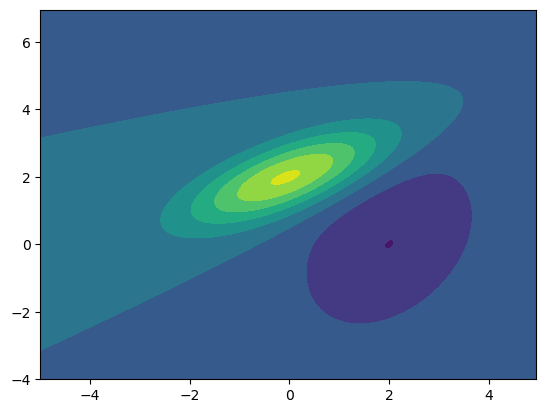

In [7]:
# 3.4

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,4]], np.mgrid[-5:5:.05, -4:7:.05])

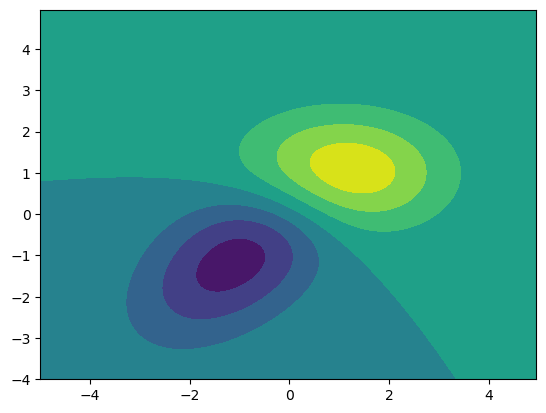

In [8]:
# 3.5

plot_normal_dif([1,1], [-1,-1], [[2,0], [0,1]], [[2,1],[1,2]], np.mgrid[-5:5:.05, -4:5:.05])

In [9]:
# 4.1 Compute mean of sample points.

np.random.seed(306)

mu1, sigma1 = 3, 3
mu2, sigma2 = 4, 2
X1 = np.random.normal(mu1, sigma1, 100)
X2 = np.dot(X1, 0.5) + np.random.normal(mu2, sigma2, 100)

mean = (np.average(X1), np.average(X2))
print(mean)

(3.2527885454529595, 5.187409318687432)


In [10]:
# 4.2 Compute the 2 × 2 covariance matrix of the sample
    
def compute_cov(mu1, mu2, X1, X2):
    cov = 0
    for i in range(100):
        cov += (X1[i] - mu1) * (X2[i] - mu2)
    return cov / len(X1)
      
mu1, mu2 = mean[0], mean[1]
cov_X1_X1 = compute_cov(mu1, mu1, X1, X1)
cov_X2_X2 = compute_cov(mu2, mu2, X2, X2)
cov_X1_X2 = compute_cov(mu1, mu2, X1, X2)

cov_matrix = [[cov_X1_X1, cov_X1_X2],[cov_X1_X2, cov_X2_X2]]
print(cov_matrix)

[[8.703869915403628, 4.514329706946918], [4.514329706946918, 6.4791358210652925]]


In [11]:
# 4.3 Compute eigenvectors and eigenvalues of covariance matrix.

from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(cov_matrix)
eigenvector1 = [eigenvectors[0][0], eigenvectors[1][0]]
eigenvector2 = [eigenvectors[0][1], eigenvectors[1][1]]
print(eigenvalues[0], eigenvector1)
print(eigenvalues[1], eigenvector2)


12.240861227261146 [0.7871631767059206, 0.6167447877673906]
2.9421445092077767 [-0.6167447877673906, 0.7871631767059206]


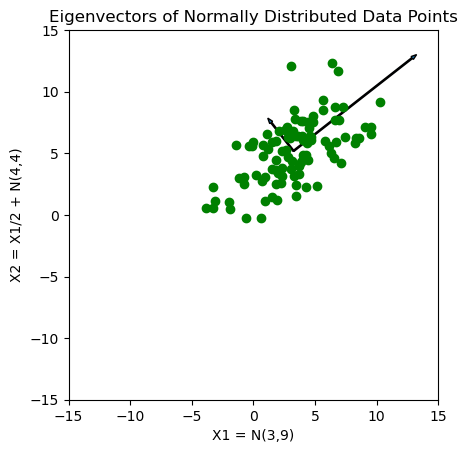

In [12]:
# 4.4 Plot sample points and eigenvectors

plt.arrow(mu1, mu2, eigenvector1[0] * eigenvalues[0], eigenvector1[1] * eigenvalues[0], width = 0.1)
plt.arrow(mu1, mu2, eigenvector2[0] * eigenvalues[1], eigenvector2[1] * eigenvalues[1], width = 0.1)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X1 = N(3,9)')
plt.ylabel('X2 = X1/2 + N(4,4)')
plt.title('Eigenvectors of Normally Distributed Data Points')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(X1, X2, 'go')

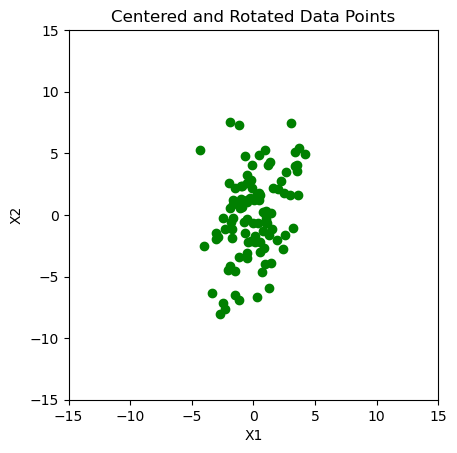

In [13]:
# 4.5 Center and rotate points

U_t = eigenvectors
X1_centered = X1 - mu1
X2_centered = X2 - mu2

X1_rotated = []
X2_rotated = []
for i in range(100):
    new_pt = U_t.dot([X1_centered[i], X2_centered[i]])
    X1_rotated.append(new_pt[0])
    X2_rotated.append(new_pt[1])
    
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Centered and Rotated Data Points')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(X1_rotated, X2_rotated, 'go')

In [14]:
# Problem 8

import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam"]:
        data = np.load(f"../data/{data_name}-data-hw3.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)


In [15]:
# Setting fields
mnist_data = np.load(f"../data/mnist-data-hw3.npz")
spam_data = np.load(f"../data/spam-data-hw3.npz")

mnist_test_data = mnist_data["test_data"]
mnist_training_data = mnist_data["training_data"]
mnist_training_labels = mnist_data["training_labels"]
spam_test_data = spam_data["test_data"]
spam_training_data = spam_data["training_data"]
spam_training_labels = spam_data["training_labels"]    

In [16]:
# 8.1 Fit a Gaussian distribution to pixel values using MLE.

from scipy.cluster.vq import whiten

# Normalize images.
whiten(mnist_test_data)
whiten(mnist_training_data)
whiten(spam_test_data)
whiten(spam_training_data)

/Users/AmandaRachelYao/opt/anaconda3/lib/python3.9/site-packages/scipy/cluster/vq.py:136: RuntimeWarning: Some columns have standard deviation zero. The values of these columns will not change.
  warnings.warn("Some columns have standard deviation zero. "


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.85346117, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.46336529, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.77079969],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
# Flatten data

def flatten_data(data):
    flattened_data = []
    for d in data:
        flattened_data.append(d.flatten())
    return flattened_data

mnist_training_data = flatten_data(mnist_training_data)

In [100]:
# Fitting Gaussians using MLE

# Compute mean and variance of Gaussian.
def gaussian_mean(data):
    return np.mean(data, axis = 0)

def gaussian_cov(data):
    return np.cov(data, rowvar = False)

def classify_digits(data, labels):
    zero, one, two, three, four, five, six, seven, eight, nine = [],[],[],[],[],[],[],[],[],[]
    for i in range(len(labels)):
        label = labels[i]
        if label == 0:
            zero.append(data[i])
        elif label == 1:
            one.append(data[i])
        elif label == 2:
            two.append(data[i])
        elif label == 3:
            three.append(data[i])
        elif label == 4:
            four.append(data[i])
        elif label == 5:
            five.append(data[i])
        elif label == 6:
            six.append(data[i])
        elif label == 7:
            seven.append(data[i])
        elif label == 8:
            eight.append(data[i])
        elif label == 9:
            nine.append(data[i])
    return zero, one, two, three, four, five, six, seven, eight, nine

In [101]:
zero, one, two, three, four, five, six, seven, eight, nine = classify_digits(mnist_training_data, mnist_training_labels)
mnist_data = [zero, one, two, three, four, five, six, seven, eight, nine]

In [102]:
mnist_means = [0] * 10
mnist_covs = []
for i in range(10):
    mnist_means[i] = gaussian_mean(mnist_data[i])
    mnist_covs.append(gaussian_cov(mnist_data[i]))

AxesImage(80,52.8;496x369.6)


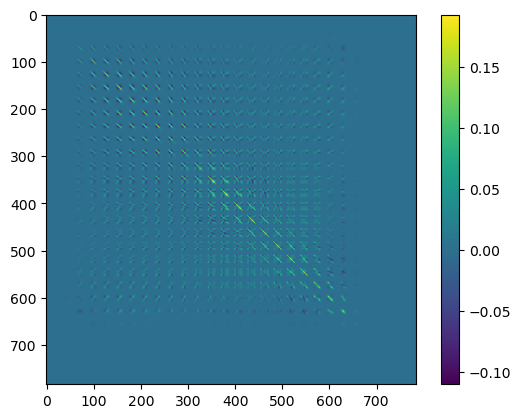

In [103]:
# 8.2 Visualize a covariance matrix for digit 0.

print(plt.imshow(mnist_covs[6]))
plt.colorbar()

In [104]:
# 8.3

# Returns indices for training_labels and training_data that are set aside for validation and for training.
def shuffle_partition(data, count):
    indices = np.arange(0, len(data), 1)
    np.random.shuffle(indices)
    return indices[0:count], indices[count:]

# Computes prior probabilities
def compute_priors(data, total):
    arr = [0] * len(data)
    for i in range(len(data)):
        arr[i] = len(data[i]) / total
    return arr

#  
def compute_gaussians(data, means, cov):
    gaussians = []
    for i in range(len(means)):
        print(data.shape)
        gaussians.append(multivariate_normal.logpdf(data, means[i], cov, allow_singular = True))
    predictions = np.argmax(gaussians, axis=0) + 1
    return predictions
    
# Computes the error rate
def compute_error_rate(estimations, labels):
    num_correct = 0
    num_total = len(labels)
    return 1 - (num_correct/num_total)

# Create plot. 
def create_plot(num_train, training_accuracy, plot_title):
    x = num_train
    y = error_rates
    plt.title(plot_title) 
    plt.ylabel('Error Rates') 
    plt.xlabel('Training Data')  
    plt.plot(x, y, label = "Error Rates")
    plt.legend()
    plt.show()

In [105]:
# 10,000 training data set aside for validation.
mnist_validation, mnist_training = shuffle_partition(mnist_training_data, 10000)

In [106]:
# Compute cooled within-class covariance
mnist_cov = np.zeros((784, 784))
total = 0
for i in range(10):
    mnist_cov += mnist_covs[i] * len(mnist_data[i])
    total += len(mnist_data[i])
mnist_cov = np.dot(mnist_cov, 1/total)

In [107]:
# Compute prior probabilities
mnist_priors = compute_priors(mnist_data, 60000)

In [108]:
# Create Gaussians for each class
#mnist_gaussians = compute_gaussian_LDA(mnist_means, mnist_cov)
error_rates = []

# Run model on training_data_points, and calculate error rates.
num_training_pts = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for num in num_training_pts:
    compute_gaussians(mnist_training_data[mnist_training[:num]], mnist_means, mnist_cov)
    error_rates.append(compute_error_rate(estimations, mnist_training_labels[mnist_training[:num]]))
    
# Plot error rate versus number of training points.
create_plot(num_training_pts, error_rates, "Error Rates versus Number of Training Points: MNIST, LDA")


TypeError: only integer scalar arrays can be converted to a scalar index

In [61]:
# Q8.3b QDA

mnist_gaussians = compute_gaussian_QDA(mnist_means, mnist_covs)
error_rates = []

# Run model on training_data_points, and calculate error rates.
num_training_pts = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for num in num_training_pts:
    estimations = validate_gaussian_pts(mnist_gaussians, mnist_means, mnist_cov, mnist_training_data[mnist_training[:num]])
    error_rates.append(compute_error_rate(estimations, mnist_training_labels[mnist_training[:num]]))
    
# Plot error rate versus number of training points.
create_plot(num_training_pts, error_rates, "Error Rates versus Number of Training Points: MNIST, QDA")



In [ ]:
# Scratch Work

# Returns array of optimal Gaussians for each class.
def compute_gaussian_LDA(means, cov):
    mnist_gaussian = []
    for mean in means:
        mnist_gaussian.append(multivariate_normal(mean, cov, allow_singular = True))
    return mnist_gaussian

# Returns array of optimal Gaussians for each class.
def compute_gaussian_QDA(means, covs):
    mnist_gaussian = []
    for i in range(len(means)):
        mnist_gaussian.append(multivariate_normal(means[i], covs[i], allow_singular = True))
    return mnist_gaussian

# Validate 
def validate_gaussian_pts(gaussians, means, cov, data_points):
    pdf_values = []
    for i in range(len(gaussians)):
        pdf_values.append(gaussians[i].logpdf(data_points, means[i], cov, allow_singular = True))